# Data Analysis and Iris Classifier Model Construction

Chin Hock Yang

## 1. Data Preparation

### 1.1 Loading Essential Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from plotly.figure_factory import create_distplot
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

### 1.2 Load Data

- The Data Used is the ```iris.data``` stored in the [original data repository](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/). The ```iris.data``` is renamed to ```iris.csv``` which contains only 5 columns of data values without any header names

- ```iris.csv``` data is then stored in the ```data``` folder in this repository

In [2]:
df = pd.read_csv("data/iris.csv", header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "type"])
df

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 1.3 Pretty Name Dictionary

The Dictionary created below are used to display Pretty names on diagrams and charts

In [3]:
dct_name_mapper = {
    'Iris-virginica': 'Virginica', 
    'Iris-setosa': 'Setosa',
    'Iris-versicolor': 'Versicolor',
    'Virginica': 'Iris-virginica',
    'Setosa': 'Iris-setosa',
    'Versicolor': 'Iris-versicolor',
}

dct_feature_name_mapper = {
    "sepal_length": "Sepal Length",
    "sepal_width": "Sepal Width",
    "petal_length": "Petal Length",
    "petal_width": "Petal Width",
    "normalised_sepal_length": "Normalised Sepal Length",
    "normalised_sepal_width": "Normalised Sepal Width",
    "normalised_petal_length": "Normalised Petal Length",
    "normalised_petal_width": "Normalised Petal Width"
}

color_scheme = {
    'Setosa': '#4C3277',
    'Versicolor': '#FFB6A2',
    'Virginica': '#FF4674',
}

## 2. Data Quality Assessment

### 2.1 Check For Missing Values and Exploring the Distribution of Features

There are equal number of each types (or classes) of Iris in the dataset

In [4]:
df["type"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: type, dtype: int64

For Sepal Length, there are no missing values and the data seems to be "left-skewed", or more concentrated between 4.3 (minimum) and 5.8 (median).

In [5]:
print(f'Empty Values: {sum(df["sepal_length"].isnull())}')
df["sepal_length"].describe()

Empty Values: 0


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

No missing values exist for sepal width too. There is a low variance (or standard deviation) of both the sepal length and sepal width as compared to that of petal length and width.

In [6]:
print(f'Empty Values: {sum(df["sepal_width"].isnull())}')
df["sepal_width"].describe()

Empty Values: 0


count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [7]:
print(f'Empty Values: {sum(df["petal_length"].isnull())}')
df["petal_length"].describe()

Empty Values: 0


count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [8]:
print(f'Empty Values: {sum(df["petal_width"].isnull())}')
df["petal_width"].describe()

Empty Values: 0


count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

Since no missing value is present, all 150 data records are kept for analysis

In [9]:
print(f"Number of data points before removing missing values: {len(df)}")
df.dropna(inplace=True)
print(f"Number of data points after removing missing values: {len(df)}")

Number of data points before removing missing values: 150
Number of data points after removing missing values: 150


### 2.2 Normalising of Columns

Since the values of sepal length is greater than the values of the other features, for all the features, a new normalised version of the features are created through normalisation (value - minimum / range) so that the range of all normalised features are kept between 0 and 1.

In [10]:
for column in df.columns:
    if df[column].dtype == "float64":
        df[f'normalised_{column}'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) 

In [11]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,type,normalised_sepal_length,normalised_sepal_width,normalised_petal_length,normalised_petal_width
0,5.1,3.5,1.4,0.2,Iris-setosa,0.222222,0.625000,0.067797,0.041667
1,4.9,3.0,1.4,0.2,Iris-setosa,0.166667,0.416667,0.067797,0.041667


### 2.3 Encode Type of Iris (Target Variable)

For the usage of Machine Learning models and other statistical techniques in this analysis, the "type" column representing the class of Iris each data points belong to is being encoded to numerical values, where 0 represent a Setosa Iris, 1 represents a Versicolor Iris and 2 represents a Virginica Iris.

In [12]:
from sklearn import preprocessing

In [13]:
le = preprocessing.LabelEncoder()
le.fit(df["type"])

df["encoded_type"] = pd.Series(le.transform(df["type"]))

# dictionary of type -> encoded
dct_type_encoded = df[["type", "encoded_type"]].drop_duplicates().set_index(["type"])["encoded_type"].to_dict()
# dictionary of encoded -> type
dct_encoded_type = df[["encoded_type", "type"]].drop_duplicates().set_index(["encoded_type"])["type"].to_dict()

df[["encoded_type", "type"]].sample(5)

,encoded_type,type
87,1,Iris-versicolor
49,0,Iris-setosa
139,2,Iris-virginica
90,1,Iris-versicolor
3,0,Iris-setosa


## 3. Supervised Learning

For the problem and data present, Supervised Machine Learning models can be developed to create models that are able to predict the type of Iris a new data point belongs to. By using the feature importances of weights learnt by these models, we can also analyse the characteristics of the various Iris types and understnad the Iris flowers in the garden better.

In [14]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### 3.1 Decision Tree Model

The first model to be explored is the Decision Tree (part of CART - Classification and Regression Tree) model.

Decision Tree might be the most suitable model for this context, as the binary split in each nodes in this model could be easily interpreted and evaluated by the garden business operator. For Decision Tree model, the original values of the features can be used (instead of normalised versions) without hurting the model's predictive performance hence they will be used for easier explainability of the model.

In [15]:
from sklearn.tree import DecisionTreeClassifier

For all the model development, I will be setting 30% of the flowers as the "Hold Out" dataset that will be used for model evaluation, and the remaining 70% to be used for model building (using the same random_state to ensure the same subset of data are placed in the "Hold Out" and "Build" groups)

In [54]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

X_build, X_holdout, Y_build, Y_holdout = train_test_split(
    df[features], df["encoded_type"], test_size=0.3, random_state=0
)

X_build = np.array(X_build)
X_holdout = np.array(X_holdout)
Y_build = np.array(Y_build)
Y_holdout = np.array(Y_holdout)

print(f"Number of Data used for Model Building: {Y_build.shape[0]}")
print(f"Number of Data used for Holdout Model Testing: {X_holdout.shape[0]}")

Number of Data used for Model Building: 105
Number of Data used for Holdout Model Testing: 45


#### 3.1.1 Hyper-parameter Tuning of Max Depth

There are many hyper-parameters that can be tuned for a CART model. If no specifications are made, the CART model will likely overfit the training data resulting in a model that has a very poor predictive capability on unobserved data.

Since we only have 4 features, I will first reduce the maximum height of the tree so that the number of splitting criterion used is being limited, which could simplify the prediction process of a new data point. However, I will also need to minimise the reduction in the predictive capability of the model.

To perform the hyper-parameter tuning, I will further split the "Build" dataset into training data and testing data, and compare the accuracy of prediction of models that are built using different max depths of tree.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_build, Y_build, test_size=0.3, random_state=0
)

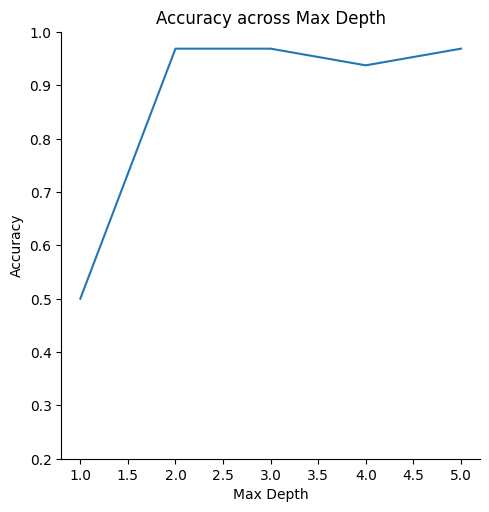

In [18]:
df_depth_tuning = pd.DataFrame()

for i in range(1,6):
    baseline_model = DecisionTreeClassifier(max_depth=i)
    baseline_model_fit = baseline_model.fit(X_train, Y_train)
    y_pred_baseline = baseline_model_fit.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred_baseline)

    df_depth_tuning = pd.concat([
        df_depth_tuning, 
        pd.DataFrame({
            "max_depth": [i],
            "accuracy": [accuracy]
        })
    ])

ax = sns.relplot(
    data=df_depth_tuning,
    x='max_depth',
    y="accuracy",
    kind="line"
)

ax.set(ylim=(0.2, 1))
ax.fig.gca().set_title("Accuracy across Max Depth")
ax.fig.gca().set_ylabel("Accuracy")
ax.fig.gca().set_xlabel("Max Depth")
plt.show()

From the chart above, a CART model with a max depth of 3 has the best accuracy score, and hence it will be used for all CART trees constructed in the remainder of the analysis

#### 3.1.2 K-Fold Cross Validation

While the model above (using max_depth of 3) has a high accuracy score, I will need to ensure the robustness of the model so that it can predict well on unseen data.

Since there is a low number of data present in this study, the cross-validation technique can be used to improve  the model building process.

The function below takes in the training data, model, and returns the fitted model and the train and test accuracy of the K-Fold Cross Validation. Train accuracy is calculated through predictions made on the training data in each fold, and it measure how well the model has learnt from the training data. Test accuracy on the other hand is calculated through predictions made on the test data in each fold, and it measures both how much signal the model picked up from the training data as well as how much noises the model has picked up (a model with low test accuracy means it has picked up more noise than signal and hence will not be robust to unseen data).

In [19]:
def kfold_cross_validation_fit(X, Y, model, stratified=False, splits=3, verbose=True, kmeans=False):
        X = np.array(X)
        Y = np.array(Y)

        if stratified:
            kf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=2022)
            kf.get_n_splits(X, Y)
        else:
            kf = KFold(n_splits=splits, shuffle=True, random_state=2022)
            kf.get_n_splits(X, Y)
        
        # ----- Train ----- #
        train_y_preds = [] # predictions
        train_true = [] # true labels

        # ----- Test ----- #
        all_y_preds = [] # predictions
        all_y_true = [] # true labels

        for train, test in kf.split(X, Y):
            # get the current train and test sets (for this particular fold)
            X_train, Y_train = X[train], Y[train]
            X_test, Y_test = X[test], Y[test]

            model_fit = model.fit(X_train, Y_train)

            # predict on training set
            y_pred_train = model_fit.predict(X_train)

            dct_kmeans_corrected = {0: 1, 1: 0}
            if kmeans:
                y_pred_train = [dct_kmeans_corrected[i] if (i == 0) or (i == 1) else i for i in y_pred_train]

            train_y_preds.extend(y_pred_train)
            train_true.extend(Y_train)
            
            # predict on validation set
            y_pred = model_fit.predict(X_test)

            if kmeans:
                y_pred = [dct_kmeans_corrected[i] if (i == 0) or (i == 1) else i for i in y_pred]

            all_y_preds.extend(y_pred)
            all_y_true.extend(Y_test)

            if verbose:
                print("Train Confusion Matrix:\n")
                cm_train = confusion_matrix(train_true, train_y_preds)

                disp = ConfusionMatrixDisplay(cm_train, display_labels=["Setosa", "Versicolor", "Virginica"])
                disp.plot(cmap=plt.cm.Blues)
                plt.title("Prediction on Train Data",pad=5)
                plt.show()

                print("Test Confusion Matrix:\n")
                cm_test = confusion_matrix(all_y_true, all_y_preds)
                disp = ConfusionMatrixDisplay(cm_test, display_labels=["Setosa", "Versicolor", "Virginica"])
                disp.plot(cmap=plt.cm.Blues)
                plt.title("Prediction on Test Data",pad=5)
                plt.show()                
            
            train_accuracy = accuracy_score(train_true, train_y_preds)
            test_accuracy = accuracy_score(all_y_true, all_y_preds)
            return model_fit, train_accuracy, test_accuracy

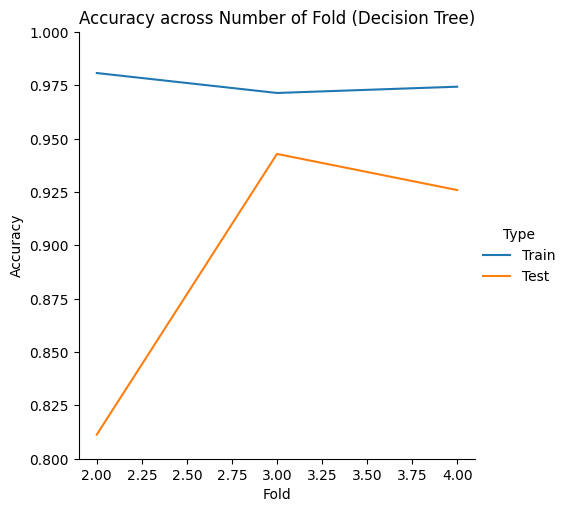

In [20]:
df_fold_tuning = pd.DataFrame()

for i in range(2, 5):
    clf_model = DecisionTreeClassifier(max_depth=3)
    baseline_fold_fit, train_accuracy, test_accuracy = kfold_cross_validation_fit(X_build, Y_build, clf_model, False, i, verbose=False)

    df_fold_tuning = pd.concat([
        df_fold_tuning, 
        pd.DataFrame({
            "fold": [i, i],
            "accuracy": [train_accuracy, test_accuracy],
            "Type": ["Train", "Test"],
        })
    ])


ax = sns.relplot(
    data=df_fold_tuning,
    x='fold',
    y="accuracy",
    hue="Type",
    kind="line"
)

ax.set(ylim=(0.8, 1))
ax.fig.gca().set_title("Accuracy across Number of Fold (Decision Tree)")
ax.fig.gca().set_ylabel("Accuracy")
ax.fig.gca().set_xlabel("Fold")
plt.show()

From the results above, a 3-Fold Cross Validation achieves the highest test accuracy while maintaining a high train accuracy. 

A lower number of fold results in too little signal picked up by the model, while a higher number of fold results in too much noises picked up as there is too little data in each fold being used for model construction.

#### 3.1.3 Tree Visualisation and Insights Gained

Using Cross Validation of 3 folds and Max Depth of 3, I will extract insights by visualising the graph structure of a Decision Tree model and use its splitting criterions

In [60]:
clf_model = DecisionTreeClassifier(max_depth=3)
clf_model_fit, train_accuracy, test_accuracy = kfold_cross_validation_fit(X_build, Y_build, clf_model, False, 3, verbose=False, kmeans=False)

In [61]:
from dtreeviz.trees import dtreeviz

tree_viz = dtreeviz(
    clf_model_fit,
    X_holdout, Y_holdout,
    feature_names = features,
    class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
    fancy=True
)


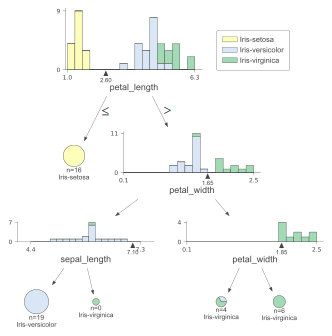

In [62]:
tree_viz

<strong>Insights Gained:</strong>
- If an Iris has a Petal Length that is smaller than 2.6 cm, then it is a Setosa Iris
- For the remaining Iris with Petal Length greater than 2.6 cm, if a Iris has a relatively small Petal Width that is smaller than 1.65 cm, and Petal Length smaller than 5.35 cm, then it is very likely a Versicolor Iris
- Or else, a Iris with a Petal width greater than 1.65 cm is very likely a Virginica Iris

### 3.2. Multi-Nomial Logistic Regression Model

Another Supervised Machine Learning model that can be used for insights extraction is the Mult-Nomial Logistic Regression model (insights can learnt from extracting the feature coefficients of the fitted model).


In [24]:
from sklearn.linear_model import LogisticRegression

Due to the linearity present in the Logistic Regression model, the normalised versions of the features are used for the model construction instead.

The same test size and random state are used to split the original data into the "Hold Out" and "Build" data groups.

In [25]:
features = ["normalised_sepal_length", "normalised_sepal_width", "normalised_petal_length", "normalised_petal_width"]

X_build_normalised, X_holdout_normalised, Y_build_normalised, Y_holdout_normalised = train_test_split(
    df[features], df["encoded_type"], test_size=0.3, random_state=0
)

X_build_normalised = np.array(X_build_normalised)
X_holdout_normalised = np.array(X_holdout_normalised)
Y_build_normalised = np.array(Y_build_normalised)
Y_holdout_normalised = np.array(Y_holdout_normalised)

#### 3.2.1 K-Fold Cross Validation

In building a Logistic Regression model, the train accuracy and test accuracy are compared across different number of folds in the K-Fold Cross Validation to obtain the best model that can be constructed

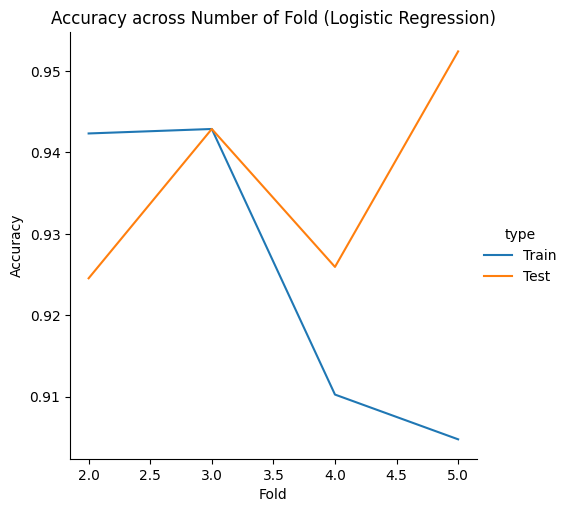

In [26]:
df_lr_tuning = pd.DataFrame()

for i in range(2, 6):
    lr_model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
    lr_fold_fit, train_accuracy, test_accuracy = kfold_cross_validation_fit(X_build_normalised, Y_build_normalised, lr_model, False, i, verbose=False)

    df_lr_tuning = pd.concat([
        df_lr_tuning, 
        pd.DataFrame({
            "fold": [i,i],
            "accuracy": [train_accuracy, test_accuracy],
            "type": ["Train", "Test"],
        })
    ])

ax = sns.relplot(
    data=df_lr_tuning,
    x='fold',
    y="accuracy",
    hue="type",
    kind="line"
)

ax.fig.gca().set_title("Accuracy across Number of Fold (Logistic Regression)")
ax.fig.gca().set_ylabel("Accuracy")
ax.fig.gca().set_xlabel("Fold")
plt.show()

Like in the Decision Tree, the most ideal number of fold of Cross Validation is 3, and I will use it to construct a model to construct a Logistic Regression model for analysis.

#### 3.2.2 Feature Importance and Insights Gained


In [27]:
lr_model = LogisticRegression(multi_class="multinomial", solver="lbfgs")

lr_model_fit, train_accuracy, test_accuracy = kfold_cross_validation_fit(X_build_normalised, Y_build_normalised, lr_model, False, 3, verbose=False)

In [28]:
df_lr_coef = pd.DataFrame(lr_fold_fit.coef_, columns=features)

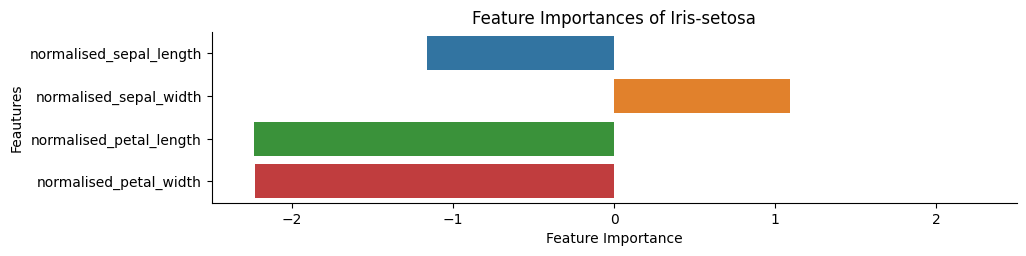

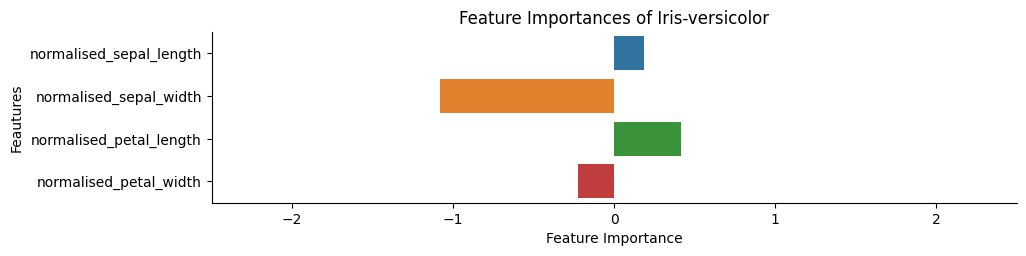

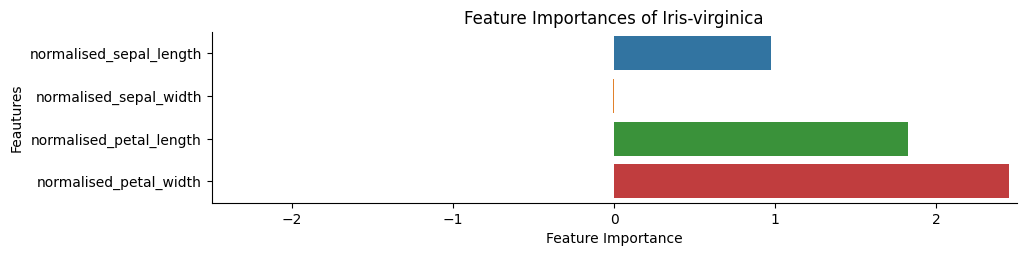

In [29]:
for i in range(0, 3):
    ax = sns.catplot(
        y = "feature",
        x = "value",
        data= df_lr_coef.loc[i,:].reset_index(drop=False).rename(columns={"index": "feature", i:"value"}),
        kind = "bar"
    )

    ax.fig.set_figheight(2)
    ax.fig.set_figwidth(15)
    ax.set(xlim=(-2.5, 2.5))
    ax.fig.gca().set_title(f"Feature Importances of {dct_encoded_type[i]}")
    ax.fig.gca().set_ylabel("Feautures")
    ax.fig.gca().set_xlabel("Feature Importance")
    plt.show()

<strong>Insights Gained:</strong>
- The observations above align with what we saw earlier, that a Setosa Iris has a smaller petal length and width, while a Virginica Iris has a larger petal length and width.
- In the Logistic Regression model, we have learnt that a Setosa Iris has a small Sepal length and large Sepal width.
- To distinguish between a Versicolor and Virginica Iris, we can possibly compare their Sepal too, as a Versicolor likely has a smaller sepal width, while a Virginica has a larger sepal length

### 3.3 K Nearest Neighbour

While the requirement given by the garden owner is to find the ten most similar data points (to an input data), I would also like to find out the optimal number of data points to use for comparison such that within that number, we are highly confident that all data points belong to the same class of Iris.

I will therefore use the K Nearest Neighbour Classifier which predicts a class of a data point based on the nearest neighbours or the most similar data points to it. I will be creating a KNN model for a range of K values and will use the same approach as earlier to determine the K that gives the most ideal predictive model.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

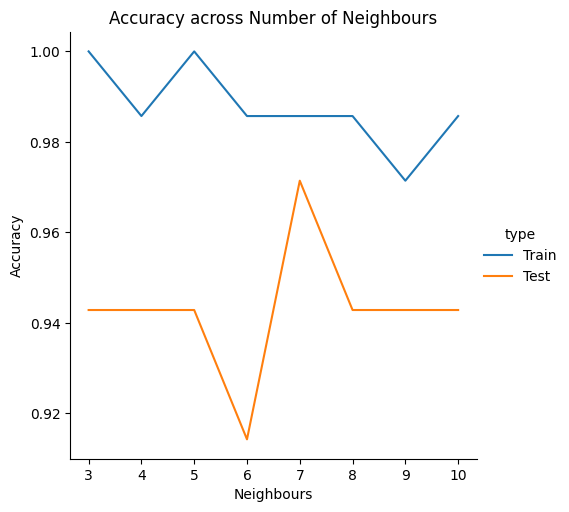

In [31]:
df_knn_tuning = pd.DataFrame()

for i in range(3, 11):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_fold_fit, train_accuracy, test_accuracy = kfold_cross_validation_fit(X_build_normalised, Y_build_normalised, knn_model, False, 3, verbose=False)

    df_knn_tuning = pd.concat([
        df_knn_tuning, 
        pd.DataFrame({
            "fold": [i, i],
            "accuracy": [train_accuracy, test_accuracy],
            "type": ["Train", "Test"],
        })
    ])

ax = sns.relplot(
    data=df_knn_tuning,
    x='fold',
    y="accuracy",
    hue="type",
    kind="line"
)

ax.fig.gca().set_title("Accuracy across Number of Neighbours")
ax.fig.gca().set_ylabel("Accuracy")
ax.fig.gca().set_xlabel("Neighbours")
plt.show()

<strong>Insights Gained:</strong>
- From the diagram above, the Model with K = 7 has the highest test accuracy among all K, which indicates that perhaps the owner can consider the top 7 closest data points instead of 10 as the data points that are the 8th closest and beyond may represent a different class of Iris from the one that is being compared.

## 4. Unsupervised Learning

An alternative approach that can be used is to identify clusters using Unsupervised Learning methods like K-Means Clustering. This approach can be used in the case where the type or class information of the Iris flowers is missing from future datasets. It can also potentially help to discover more subsets or groups within each Iris flower types.

### 4.1 K-Means Clustering

In [32]:
from sklearn.cluster import KMeans

A useful way to identify the number of clusters present in a dataset is through the "Elbow method", which calculates the distortion or Sum of Squared Errors between each data point and the centroid of the cluster. The most optimal value of k to use is the one where no noticeable or significant drop in Distortion is observed for k values greater than it.

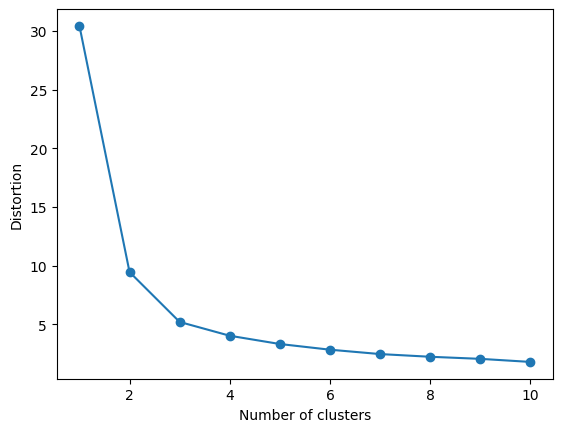

In [33]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_build_normalised)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

From the diagrams above, it is seen that the most optimal k to choose is 3, which means that there are 3 main clusters in the data points which corresponds to the number of classes of Iris we have in the garden. This means that there are no granular subgroups can be identified from the Iris classes.

In [34]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

km_model_fit = km.fit(X_build_normalised)

Comparing the cluster center of the fitted model and the mean of the features from the dataset, the encoding that the K-Means Model used is different from that used earlier, so the encoded values will need to be corrected after predictions is made

- 0 should be corrected to 1
- 1 should be corrected to 0

In [35]:
km_model_fit.cluster_centers_

array([[0.42877493, 0.29380342, 0.56627553, 0.54594017],
       [0.19281046, 0.57598039, 0.07676969, 0.05392157],
       [0.72482639, 0.45833333, 0.80137712, 0.81770833]])

In [36]:
df.query("encoded_type == 0")[["normalised_sepal_length"]].mean()["normalised_sepal_length"]

0.19611111111111115

In [37]:
df.query("encoded_type == 1")[["normalised_sepal_length"]].mean()["normalised_sepal_length"]

0.45444444444444443

In [38]:
df.query("encoded_type == 2")[["normalised_sepal_length"]].mean()["normalised_sepal_length"]

0.6355555555555555

An additional boolean parameter ```kmeans``` is added to the function ```kfold_cross_validation_fit``` to correct the classification for K-Means model prediction

## 5. Evaluation of Final Models

For each of the models above, their respective "final" models are used to make predictions on the hold out dataset.

 ==================== Decision Tree ====================
Train Confusion Matrix:



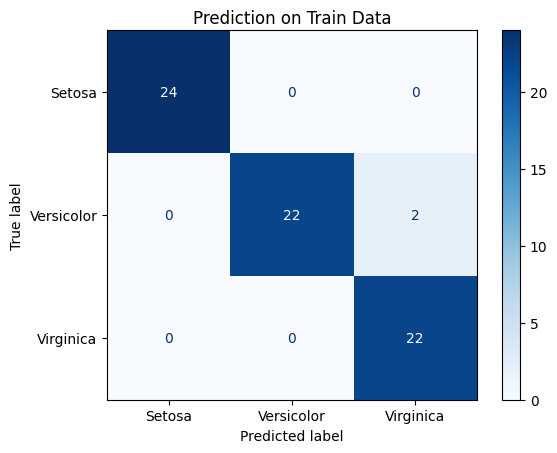

Test Confusion Matrix:



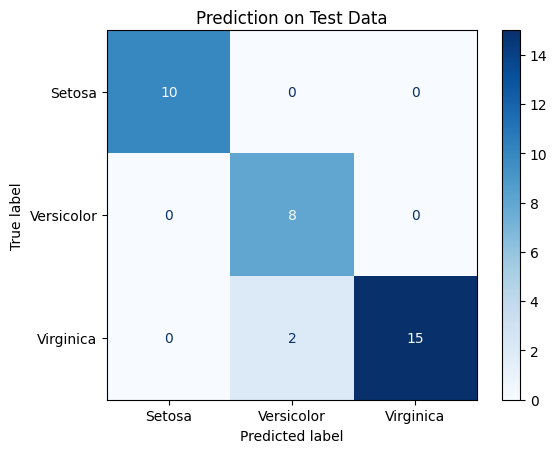

 ====================Logistic Regression ====================
Train Confusion Matrix:



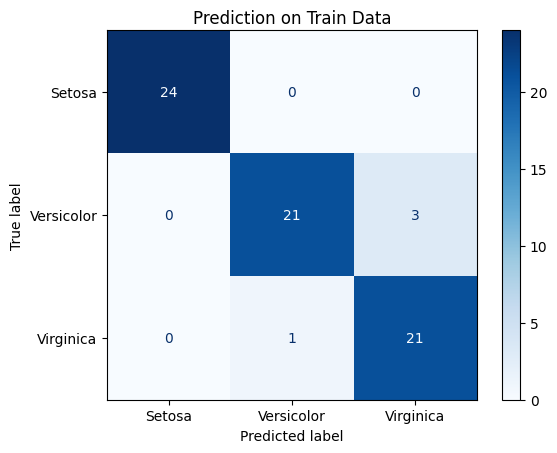

Test Confusion Matrix:



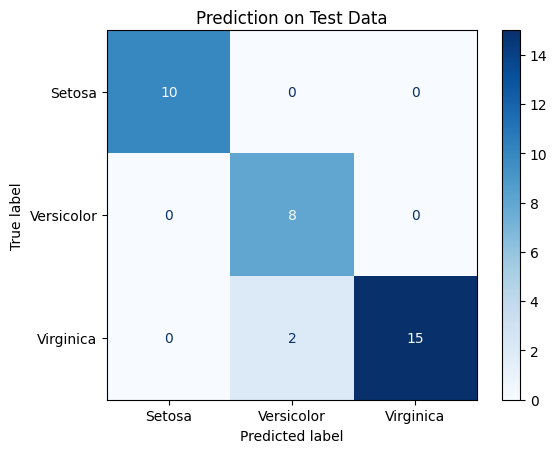

 ==================== K Nearest Neighbour ====================
Train Confusion Matrix:



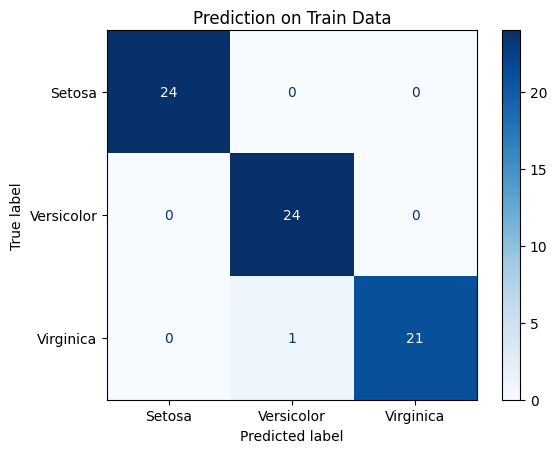

Test Confusion Matrix:



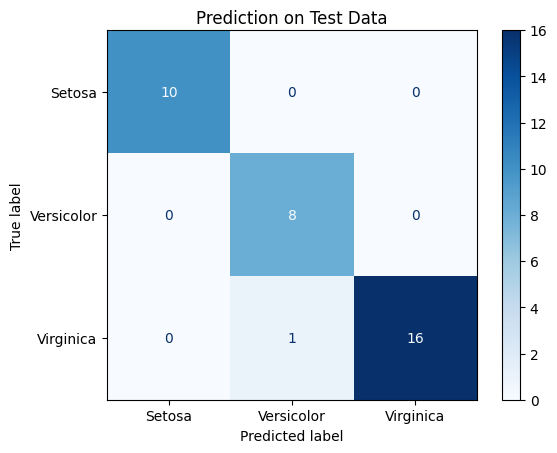

 ==================== K-Means Clustering ====================
Train Confusion Matrix:



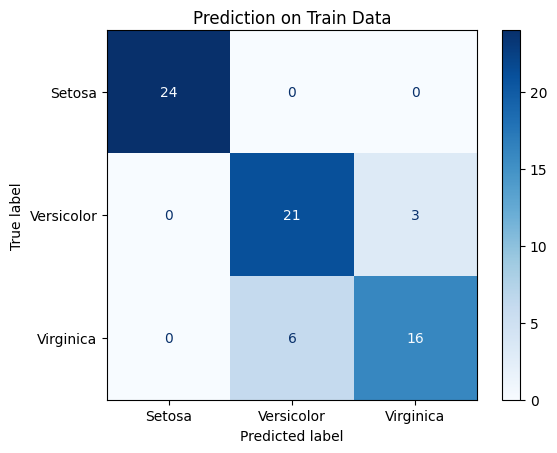

Test Confusion Matrix:



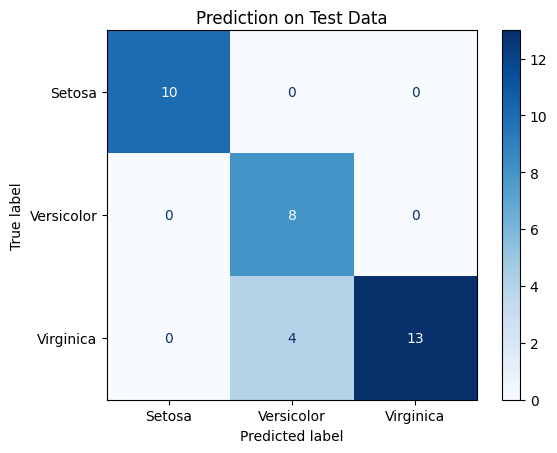

In [39]:
# Decision Tree
print(" ==================== Decision Tree ====================")
clf_model = DecisionTreeClassifier(max_depth=3)
clf_fold_fit, clf_train_accuracy, clf_test_accuracy = kfold_cross_validation_fit(X_build, Y_build, clf_model, False, 3, verbose=True)
Y_clf_pred = clf_fold_fit.predict(X_holdout)
clf_hold_out_accuracy = accuracy_score(Y_holdout, Y_clf_pred)

# Logistic Regression
print(" ====================Logistic Regression ====================")
lr_model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_fold_fit, lr_train_accuracy, lr_test_accuracy = kfold_cross_validation_fit(X_build_normalised, Y_build_normalised, lr_model, False, 3, verbose=True)
Y_lr_pred = lr_fold_fit.predict(X_holdout_normalised)
lr_hold_out_accuracy = accuracy_score(Y_holdout_normalised, Y_lr_pred)

# K Nearest Neighbour
print(" ==================== K Nearest Neighbour ====================")
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_fold_fit, knn_train_accuracy, knn_test_accuracy = kfold_cross_validation_fit(X_build_normalised, Y_build_normalised, knn_model, False, 3, verbose=True)
Y_knn_pred = knn_fold_fit.predict(X_holdout_normalised)
knn_hold_out_accuracy = accuracy_score(Y_holdout_normalised, Y_knn_pred)

# K Means
print(" ==================== K-Means Clustering ====================")
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
km_fold_fit, km_train_accuracy, km_test_accuracy = kfold_cross_validation_fit(X_build_normalised, Y_build_normalised, km, False, 3, verbose=True, kmeans=True)
Y_km_pred = km_fold_fit.predict(X_holdout_normalised)
km_hold_out_accuracy = accuracy_score(Y_holdout_normalised, Y_km_pred)

df_model_performances = pd.DataFrame({
    "Model": ["Decision Tree", "Logistic Regression", "K-Nearest Neighbour", "K-Means Clustering"],
    "Holdout Accuracy": [clf_hold_out_accuracy, lr_hold_out_accuracy, knn_hold_out_accuracy, knn_hold_out_accuracy],
    "Train Accuracy": [clf_train_accuracy, lr_train_accuracy, knn_train_accuracy, km_train_accuracy],
    "Test Accuracy": [clf_test_accuracy, lr_test_accuracy, knn_test_accuracy, km_test_accuracy]
})


All the models used obtained a very high accuracy score on the Holdout Dataset, with the Decision Tree model obtaining a 100% accuracy score. While having less Train and Test Accuracy than the Supervised Learning models, the K-Means Clustering model was able to obtain a high holdout accuracy score which makes it a capable predictive model to be used in the case where we do not have any information of the types of Iris in the garden.

In [40]:
df_model_performances

,Model,Holdout Accuracy,Train Accuracy,Test Accuracy
0,Decision Tree,1.000000,0.971429,0.942857
1,Logistic Regression,0.977778,0.942857,0.942857
2,K-Nearest Neighbour,0.977778,0.985714,0.971429
3,K-Means Clustering,0.977778,0.871429,0.885714


## 6. Evaluating Top 10 Similar Iris

### 6.1 Model Selection (for Application)

Since the main objective of the garden owner is to find the ten most similar data points in the existing Iris data given a new Input data, we will need a metric that can do such comparisons effectively.

One way of doing so is to make use of the ```predict_proba``` of the models developed earlier, by comparing the probability of classification of the new Input data with that of all other existing data in the garden.

While obtaining the highest holdout accuracy score earlier, the Decision Tree model's ```predict_proba``` is limited to 0% or 100% which makes it an unsuitable model to be used.

In [41]:
clf_predict_proba = clf_fold_fit.predict_proba(X_holdout)
clf_predict_proba[:5,:]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

Comparing between the Logistic Regression and K-Nearest Neighbours' ```predict_proba```, the Logistic Regression model has the most suitable prediction probability values of each records to be used for comparison across data points

In [42]:
lr_predict_proba = lr_fold_fit.predict_proba(X_holdout_normalised)
lr_predict_proba[:5,:]

array([[0.02873526, 0.32663331, 0.64463143],
       [0.16382382, 0.62648344, 0.20969274],
       [0.87805054, 0.10568828, 0.01626117],
       [0.01791578, 0.35741213, 0.62467209],
       [0.8282619 , 0.15410518, 0.01763291]])

In [43]:
knn_predict_proba = knn_fold_fit.predict_proba(X_holdout_normalised)
knn_predict_proba[:5,:]

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.85714286],
       [1.        , 0.        , 0.        ]])

### 6.2 Exporting the Model to ```model/``` folder

In [44]:
import pickle
    
def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [45]:
save_file(f'model/best_model.pkl', lr_fold_fit)

### 6.3 Computing Similarity Score using Cosine Similarity Algorithm

With the predict probability values of all data points, we can use Cosine Similarity, an algorithm that measure the similarity of two non-zero vectors using the angle or inner product of the vectors.

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
model = load_file(f'model/best_model.pkl')

In [48]:
df_predict_proba = pd.DataFrame(model.predict_proba(df[["normalised_sepal_length",	"normalised_sepal_width",	"normalised_petal_length",	"normalised_petal_width"]]))
df_predict_proba.rename(columns={0: "proba_setosa", 1: "proba_versicolor", 2: "proba_virginica"}, inplace=True)

df["proba_setosa"] = df_predict_proba["proba_setosa"]
df["proba_versicolor"] = df_predict_proba["proba_versicolor"]
df["proba_virginica"] = df_predict_proba["proba_virginica"]

df_predict_proba

,proba_setosa,proba_versicolor,proba_virginica
0,0.838680,0.144371,0.016949
1,0.798393,0.183611,0.017996
2,0.838381,0.147040,0.014579
3,0.821327,0.162649,0.016023
4,0.853266,0.131103,0.015631
...,...,...,...
145,0.022545,0.304767,0.672689
146,0.040346,0.446282,0.513372
147,0.038005,0.372308,0.589687
148,0.031614,0.284483,0.683903


By taking the first index of the Data Table as the "Input" data, it can be observed that while most of the results are close to the data used for comparison, there can be room for improvement as some of the data points have a Sepal Length that is too far apart (0.7) away from the reference data

In [49]:
similarity_matrix = cosine_similarity(df[["proba_setosa","proba_versicolor","proba_virginica"]])
index = pd.DataFrame(similarity_matrix[0]).sort_values(by=0, ascending=False).loc[0:,].iloc[:10,:].index
df.loc[[0] + index, :]

,sepal_length,sepal_width,petal_length,petal_width,type,normalised_sepal_length,normalised_sepal_width,normalised_petal_length,normalised_petal_width,encoded_type,proba_setosa,proba_versicolor,proba_virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,0.222222,0.625000,0.067797,0.041667,0,0.838680,0.144371,0.016949
40,5.0,3.5,1.3,0.3,Iris-setosa,0.194444,0.625000,0.050847,0.083333,0,0.838063,0.143880,0.018057
10,5.4,3.7,1.5,0.2,Iris-setosa,0.305556,0.708333,0.084746,0.041667,0,0.834696,0.145912,0.019391
2,4.7,3.2,1.3,0.2,Iris-setosa,0.111111,0.500000,0.050847,0.041667,0,0.838381,0.147040,0.014579
48,5.3,3.7,1.5,0.2,Iris-setosa,0.277778,0.708333,0.084746,0.041667,0,0.840346,0.141169,0.018486
47,4.6,3.2,1.4,0.2,Iris-setosa,0.083333,0.500000,0.067797,0.041667,0,0.837797,0.147512,0.014692
11,4.8,3.4,1.6,0.2,Iris-setosa,0.138889,0.583333,0.101695,0.041667,0,0.833454,0.149603,0.016943
6,4.6,3.4,1.4,0.3,Iris-setosa,0.083333,0.583333,0.067797,0.083333,0,0.844631,0.139094,0.016276
38,4.4,3.0,1.3,0.2,Iris-setosa,0.027778,0.416667,0.050847,0.041667,0,0.835748,0.150788,0.013464
16,5.4,3.9,1.3,0.4,Iris-setosa,0.305556,0.791667,0.050847,0.125000,0,0.840747,0.136562,0.022691


To improve the computation of the Similarity Score, we can also add in the normalised feature data into the vector to compute the Cosine Similarity scores

In [50]:
similarity_matrix_2 = cosine_similarity(df[["normalised_sepal_length", "normalised_sepal_width", "normalised_petal_length", "normalised_petal_width", "proba_setosa","proba_versicolor","proba_virginica"]])
index_2 = pd.DataFrame(similarity_matrix_2[0]).sort_values(by=0, ascending=False).loc[0:,].iloc[:10,:].index
df.loc[[0] + index_2, :]

,sepal_length,sepal_width,petal_length,petal_width,type,normalised_sepal_length,normalised_sepal_width,normalised_petal_length,normalised_petal_width,encoded_type,proba_setosa,proba_versicolor,proba_virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,0.222222,0.625000,0.067797,0.041667,0,0.838680,0.144371,0.016949
27,5.2,3.5,1.5,0.2,Iris-setosa,0.250000,0.625000,0.084746,0.041667,0,0.826542,0.154671,0.018787
39,5.1,3.4,1.5,0.2,Iris-setosa,0.222222,0.583333,0.084746,0.041667,0,0.822304,0.159208,0.018488
7,5.0,3.4,1.5,0.2,Iris-setosa,0.194444,0.583333,0.084746,0.041667,0,0.828262,0.154105,0.017633
17,5.1,3.5,1.4,0.3,Iris-setosa,0.222222,0.625000,0.067797,0.083333,0,0.825857,0.154130,0.020013
4,5.0,3.6,1.4,0.2,Iris-setosa,0.194444,0.666667,0.067797,0.041667,0,0.853266,0.131103,0.015631
28,5.2,3.4,1.4,0.2,Iris-setosa,0.250000,0.583333,0.067797,0.041667,0,0.822941,0.158711,0.018348
40,5.0,3.5,1.3,0.3,Iris-setosa,0.194444,0.625000,0.050847,0.083333,0,0.838063,0.143880,0.018057
49,5.0,3.3,1.4,0.2,Iris-setosa,0.194444,0.541667,0.067797,0.041667,0,0.824649,0.158130,0.017220
48,5.3,3.7,1.5,0.2,Iris-setosa,0.277778,0.708333,0.084746,0.041667,0,0.840346,0.141169,0.018486


The results above is much improved with most of the values of the top 10 similar data being very close to the data point used for comparison. This method will therefore be used in the application created in the ```app.py``` script in this repository.

In [63]:
! jupyter nbconvert --to html analysis.ipynb

[NbConvertApp] Converting notebook analysis.ipynb to html
[NbConvertApp] Writing 1385977 bytes to analysis.html
